In [1]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import prefect

#### Note: Ensure all terminals opened are in the mlops environment where you installed mlflow, prefect and other modules

## Homework

The goal of this homework is to familiarize users with workflow orchestration. 

Start with the orchestrate.py file in the 03-orchestration/3.4 folder
of the course repo: https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/03-orchestration/3.4/orchestrate.py

## Q1. Human-readable name

You’d like to give the first task, `read_data` a nicely formatted name.
How can you specify a task name?

> Hint: look in the docs at https://docs.prefect.io or 
> check out the doc string in a code editor.

- **`@task(retries=3, retry_delay_seconds=2, name="Read taxi data")`**
- `@task(retries=3, retry_delay_seconds=2, task_name="Read taxi data")`
- `@task(retries=3, retry_delay_seconds=2, task-name="Read taxi data")`
- `@task(retries=3, retry_delay_seconds=2, task_name_function=lambda x: f"Read taxi data")`

`@task(retries=3, retry_delay_seconds=2, name="Read taxi data")`

## Q2. Cron

Cron is a common scheduling specification for workflows. 

Using the flow in `orchestrate.py`, create a deployment.
Schedule your deployment to run on the third day of every month at 9am UTC.
What’s the cron schedule for that?

- **`0 9 3 * *`**
- `0 0 9 3 *`
- `9 * 3 0 *`
- `* * 9 3 0`

#### Downloading Data

In [2]:
!wget -q -P ./q2/data https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet

In [3]:
!wget -q -P ./q2/data https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet

#### Create  Deployment

- Go to folder q2 and copy the orchestrate.py file mentioned in the question above into q2 folder and do the following:
- In a terminal start prefect server using the command: `prefect server start`
- In another terminal, run the orchestrate.py file to create a flow using: `python orchestrate.py` 
- Initiate a prefect project using the command: `prefect project init`
- Start a worker using the command: `prefect worker start -p nyctaxi2021pool -t process`
- In another terminal deploy your flow using: `prefect deploy orchestrate.py:main_flow -n nyctaxi2021 -p nyctaxi2021pool`

#### Schedule Deployment using CLI

- You can set the CRON schedule and timezone in CLI as `0 9 3 * *` and `UTC` based using the following cron-tab description

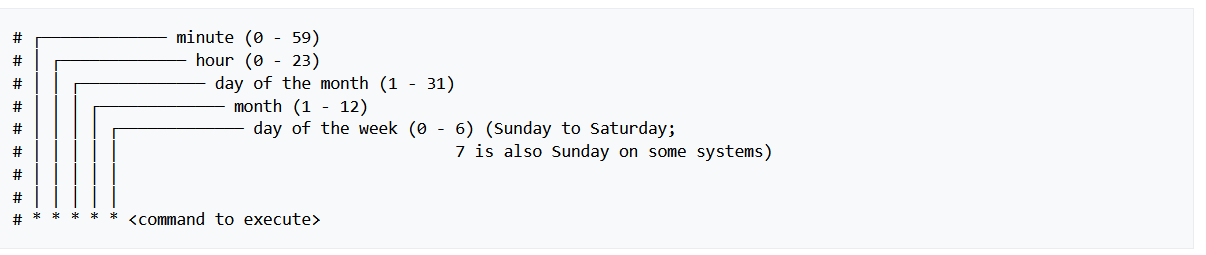

#### Schedule Deployment using UI

- Or go to the prefect server UI. Go to deployments tab and select your deployment and click on edit. 
- Click on the edit button in schedule category and click on the cron button and use the following value for the question above: `0 9 3 * *`

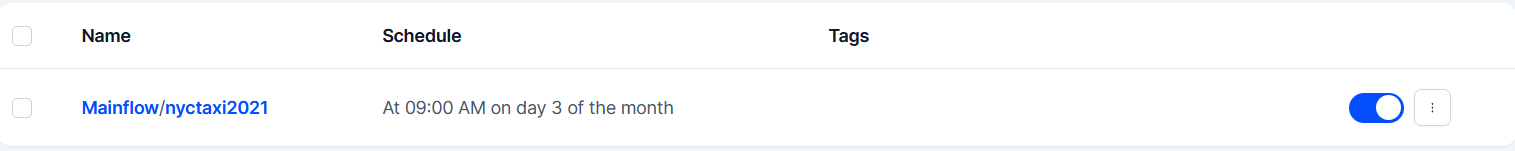

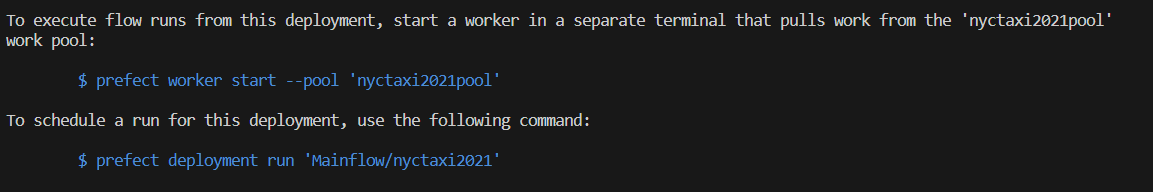

## Q3. RMSE 

Download the January 2023 Green Taxi data and use it for your training data.
Download the February 2023 Green Taxi data and use it for your validation data. 

Make sure you upload the data to GitHub so it is available for your deployment.

Create a custom flow run of your deployment from the UI. Choose Custom
Run for the flow and enter the file path as a string on the JSON tab under Parameters.

Make sure you have a worker running and polling the correct work pool.

View the results in the UI.

What’s the final RMSE to five decimal places?

- 6.67433
- **5.19931**
- 8.89443
- 9.12250

#### Downloading Data

In [4]:
!wget -q -P ./q3/data https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet

In [5]:
!wget -q -P ./q3/data https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet

#### Create Deployment

- Go to folder q3 and copy the orchestrate.py file mentioned in the question above into q3 folder and change the following part of code mentioned below and save the file:
  <br>  `train_path: str = "./data/green_tripdata_2023-01.parquet"`
  <br>  `val_path: str = "./data/green_tripdata_2023-02.parquet"` 
- In a terminal start prefect server using the command: `prefect server start`
- In another terminal, run the orchestrate.py file to create a flow using: `python orchestrate.py`
- Initiate a prefect project using the command: `prefect project init`
- Start a worker using the command: `prefect worker start -p nyctaxi2023pool -t process`
- In another terminal deploy your flow using: `prefect deploy orchestrate.py:main_flow -n nyctaxi2023 -p nyctaxi2023pool`

#### Create Custom Flow Run

- Click on deployments tab in the sidebar of prefect UI 
- Create a custom flow run clicking on the hamburger menu of the right pertaining to your deployment and select custom run
- Name the custom run and scroll down to the fill the file path of both the input parameters(autofilled) under JSON tab.
- Click on Run and wait for the flow run to complete.
- Click on the Flow Runs tab on the sidebar of Prefect UI and click on the flow run you created and ran.
- Check under the logs tab for the final RMSE.

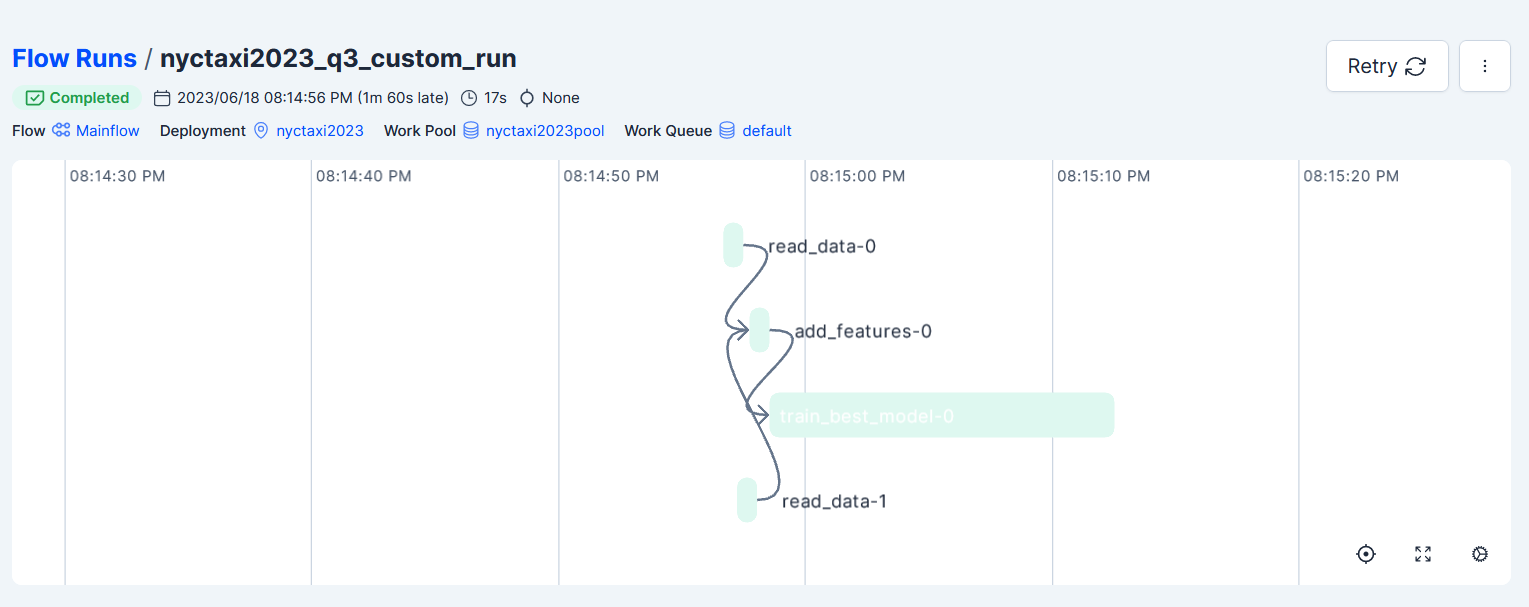

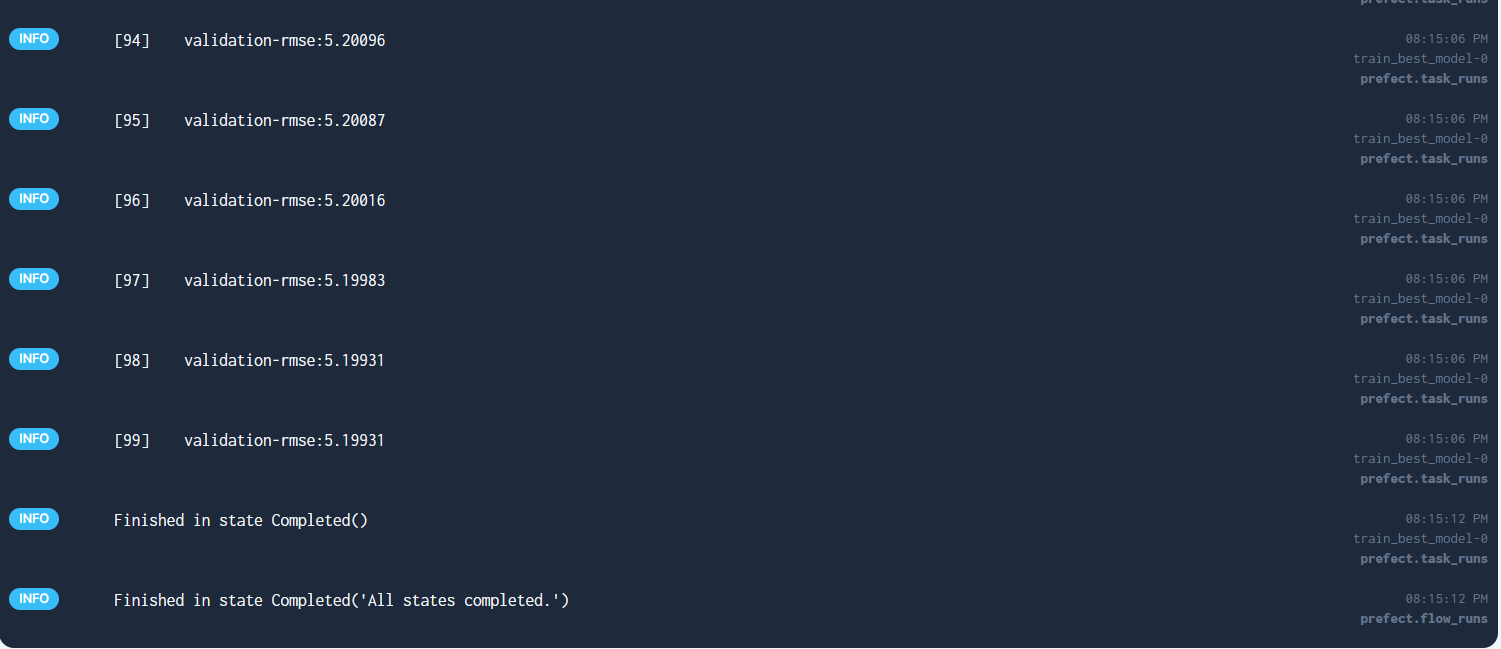

## Q4. RMSE (Markdown Artifact)

Download the February 2023 Green Taxi data and use it for your training data.
Download the March 2023 Green Taxi data and use it for your validation data. 

Create a Prefect Markdown artifact that displays the RMSE for the validation data.
Create a deployment and run it.

What’s the RMSE in the artifact to two decimal places ?

- 9.71
- 12.02
- 15.33
- **5.37**

#### Downloading Data

In [6]:
!wget -q -P ./q4/data https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet

In [7]:
!wget -q -P ./q4/data https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet

#### Create Deployment

- Go to folder q4 and copy the orchestrate.py file mentioned in the question above into q4 folder and change the following part of code mentioned below and save the file:
  <br>  `train_path: str = "./data/green_tripdata_2023-02.parquet"`
  <br>  `val_path: str = "./data/green_tripdata_2023-03.parquet"` 
- In a terminal start prefect server using the command: `prefect server start`
- In another terminal, run the orchestrate.py file to create a flow using: `python orchestrate.py`
- Initiate a prefect project using the command: `prefect project init`
- Start a worker using the command: `prefect worker start -p nyctaxi2023q4pool -t process`
- In another terminal deploy the flow using: `prefect deploy orchestrate.py:main_flow -n nyctaxi2023q4 -p nyctaxi2023q4pool`
- Run the deployment using: `prefect deployment run Mainflow/nyctaxi2023q4`

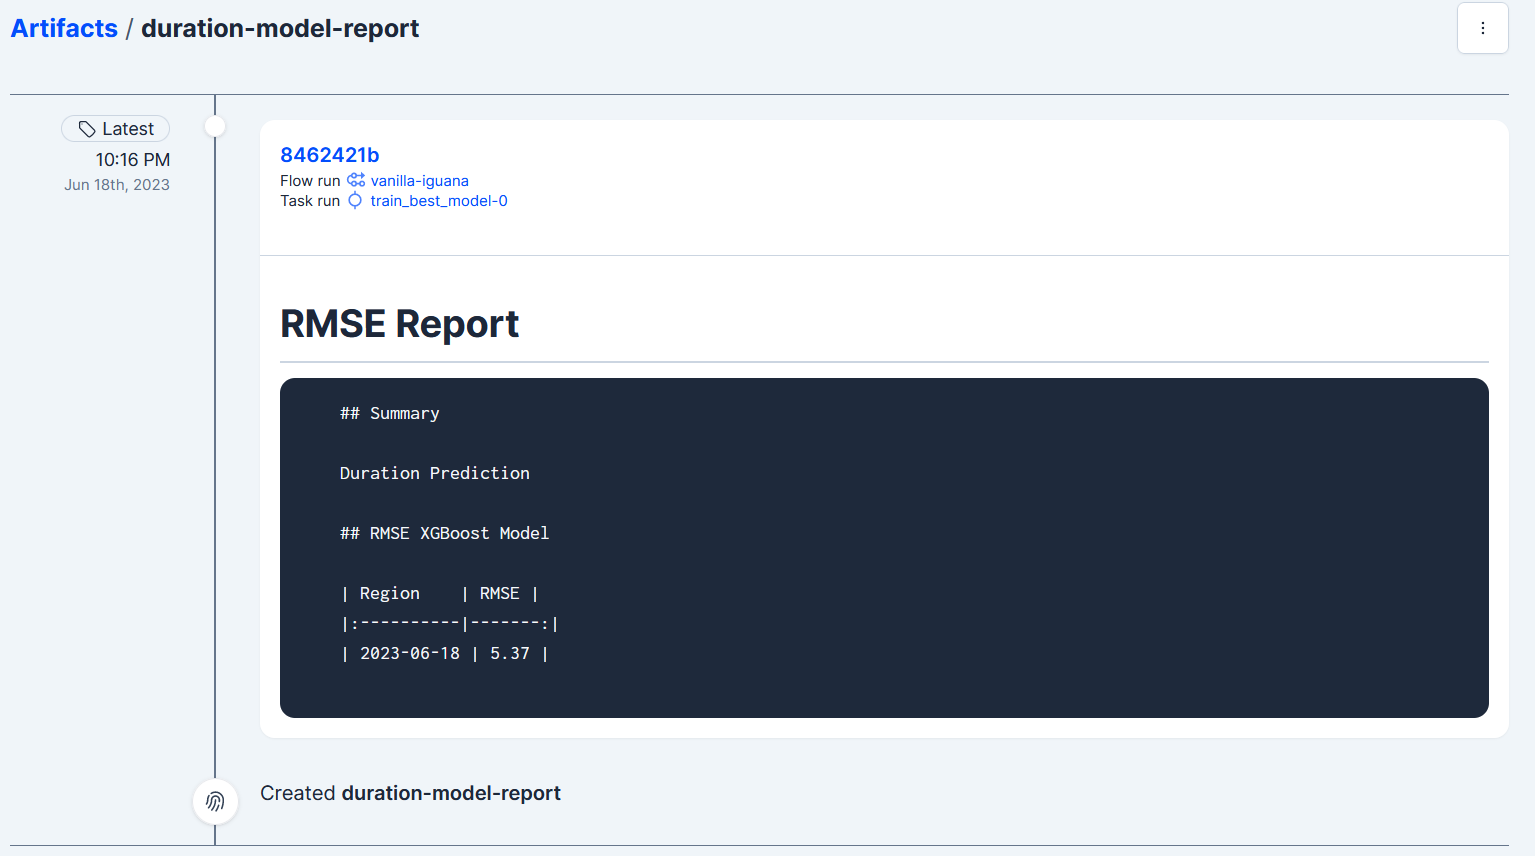

## Q5. Emails


It’s often helpful to be notified when something with your dataflow doesn’t work
as planned. Create an email notification for to use with your own Prefect server instance.
In your virtual environment, install the prefect-email integration with 

```bash
pip install prefect-email
```

Make sure you are connected to a running Prefect server instance through your
Prefect profile.
See the docs if needed: https://docs.prefect.io/latest/concepts/settings/#configuration-profiles

Register the new block with your server with 

```bash
prefect block register -m prefect_email
```

Remember that a block is a Prefect class with a nice UI form interface.
Block objects live on the server and can be created and accessed in your Python code. 

See the docs for how to authenticate by saving your email credentials to
a block and note that you will need an App Password to send emails with
Gmail and other services. Follow the instructions in the docs.

Create and save an `EmailServerCredentials` notification block.
Use the credentials block to send an email.

Test the notification functionality by running a deployment.

What is the name of the pre-built prefect-email task function?

- `send_email_message`
- **`email_send_message`**
- `send_email`
- `send_message`

#### Downloading Data

In [8]:
!wget -q -P ./q5/data https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet

In [9]:
!wget -q -P ./q5/data https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet

- Install the prefect-email module using: `pip install prefect-email`
- Start the prefect server using: `prefect server start`
- Create a new block(Email Server Credentials) by providing it with block-name, email-id and password.
- In another terminal, register the block with the server using the command: `prefect block register -m prefect_email`
- Modify the orchestrate.py code by creating a function which will notify deployment run completion
- In another terminal, run the orchestrate.py file to create a flow using: `python orchestrate.py`
- Initiate a prefect project using the command: `prefect project init`
- Start a worker using the command: `prefect worker start -p nyctaxi2023q5pool -t process`
- In another terminal deploy the flow using: `prefect deploy orchestrate.py:main_flow -n nyctaxi2023q5 -p nyctaxi2023q5pool`
- Run the deployment using: `prefect deployment run Mainflow/nyctaxi2023q5`

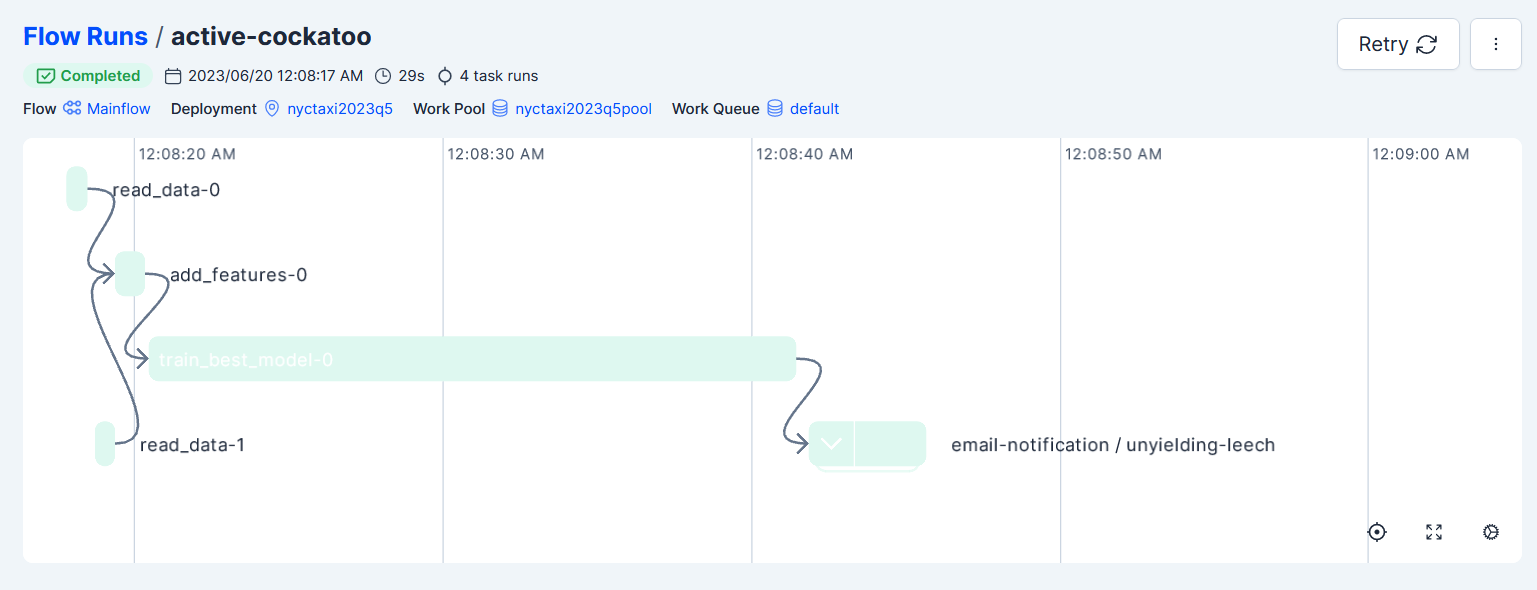

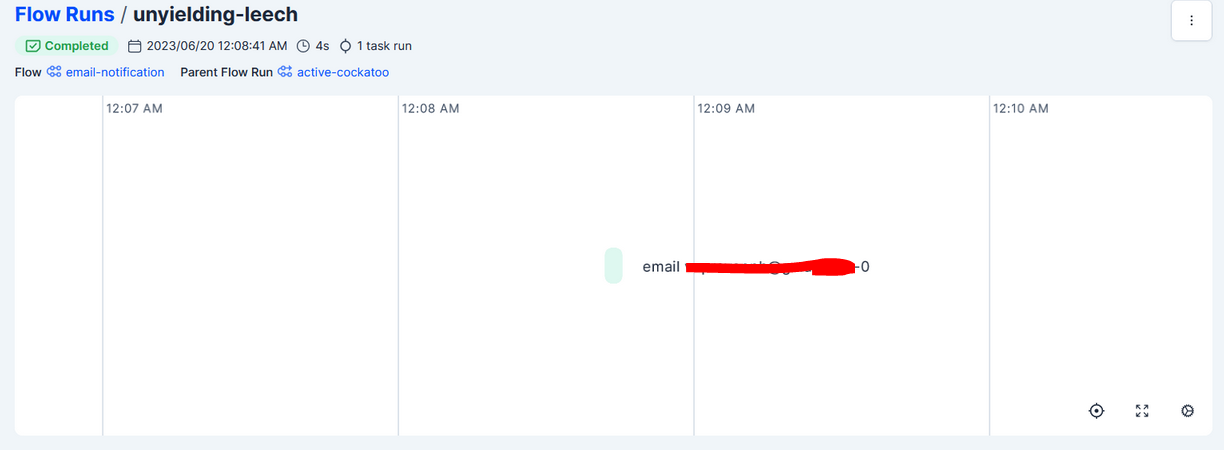

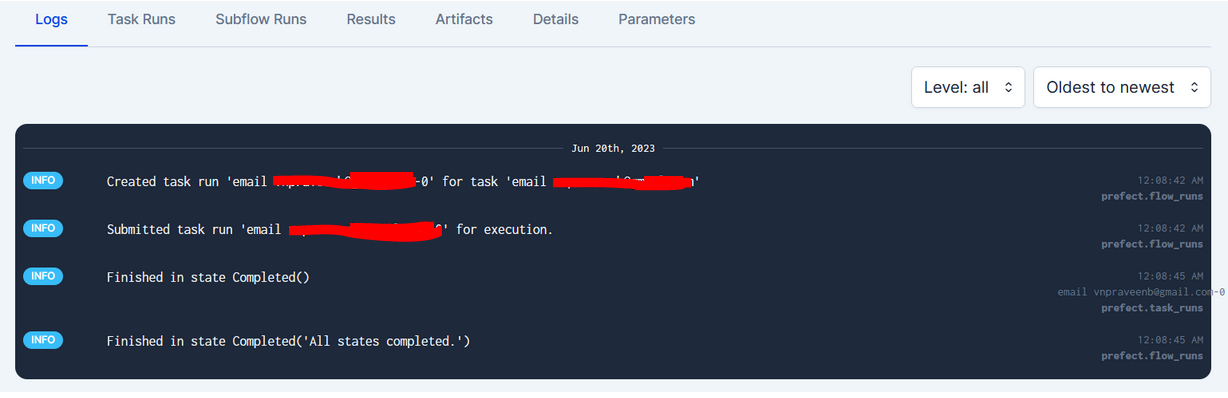

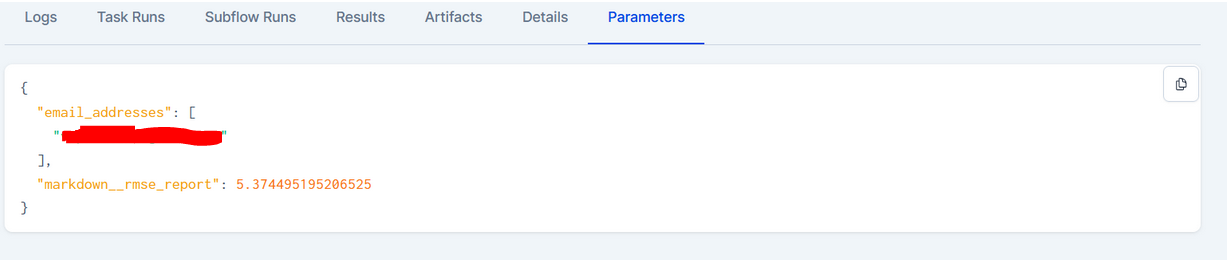

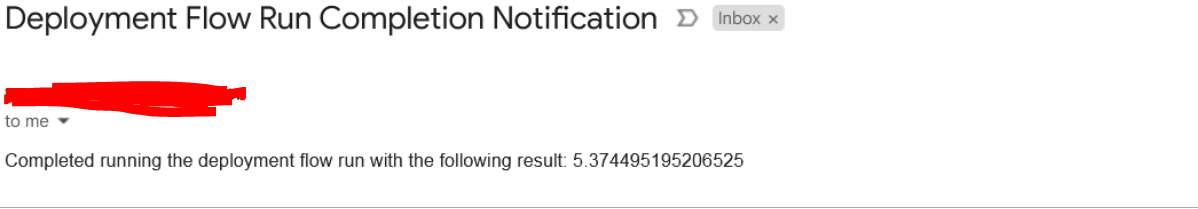

## Q6. Prefect Cloud

The hosted Prefect Cloud lets you avoid running your own Prefect server and
has automations that allow you to get notifications when certain events occur
or don’t occur. 

Create a free forever Prefect Cloud account at app.prefect.cloud and connect
your workspace to it following the steps in the UI when you sign up. 

Set up an Automation from the UI that will send yourself an email when
a flow run completes. Run one of your existing deployments and check
your email to see the notification.

Make sure your active profile is pointing toward Prefect Cloud and
make sure you have a worker active.

What is the name of the second step in the Automation creation process?

- Details
- Trigger
- **Actions**
- The end

- Go to folder q6 and copy the orchestrate.py file from q4 folder to q6 and change the following part of code mentioned below and save the file:
  <br>  `train_path: str = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet"`
  <br>  `val_path: str = ""https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet"` 
- Login to prefect cloud using: `prefect cloud login`
- Login in with the browser or api key.
- In another terminal, run the orchestrate.py file to create a flow using: `python orchestrate.py`
- Initiate a prefect project using the command: `prefect project init`
- Start a worker using the command: `prefect worker start -p nyctaxi2023q6pool -t process`
- In another terminal, deploy the flow using: `prefect deploy orchestrate.py:main_flow -n nyctaxi2023q6 -p nyctaxi2023q6pool`
- Run the deployment using: `prefect deployment run Mainflow/nyctaxi2023q6`

#### Prefect Cloud Flow-Run

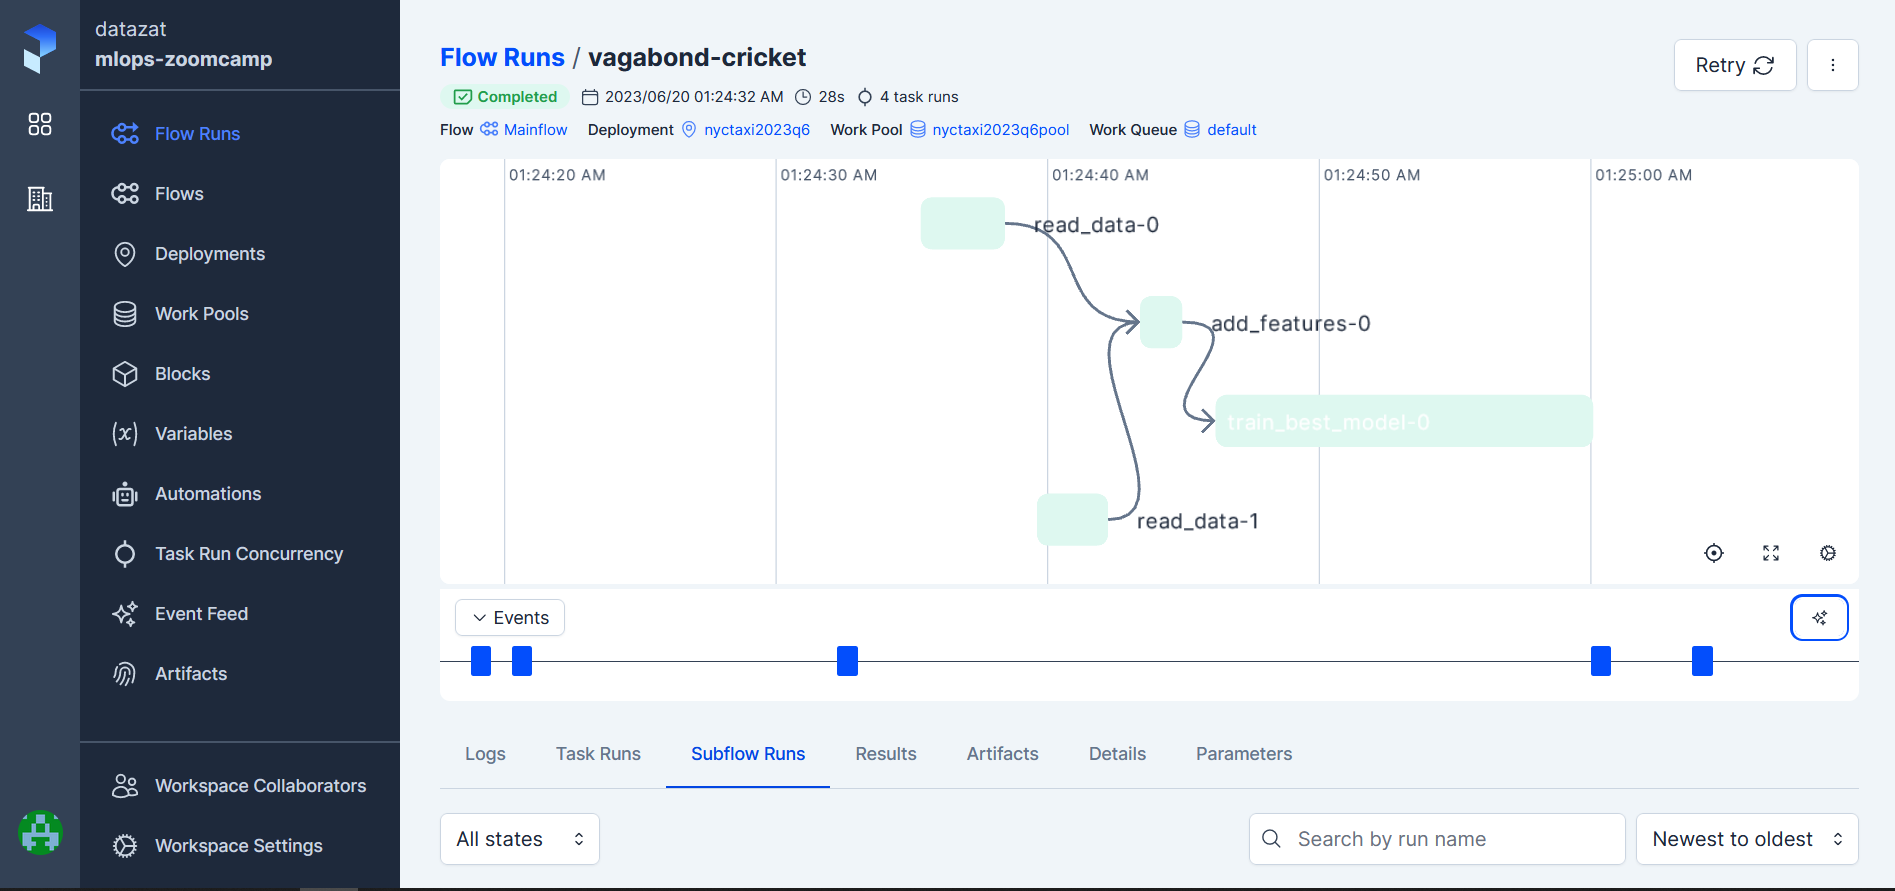

#### Email Notification from Prefect cloud notification using Automation

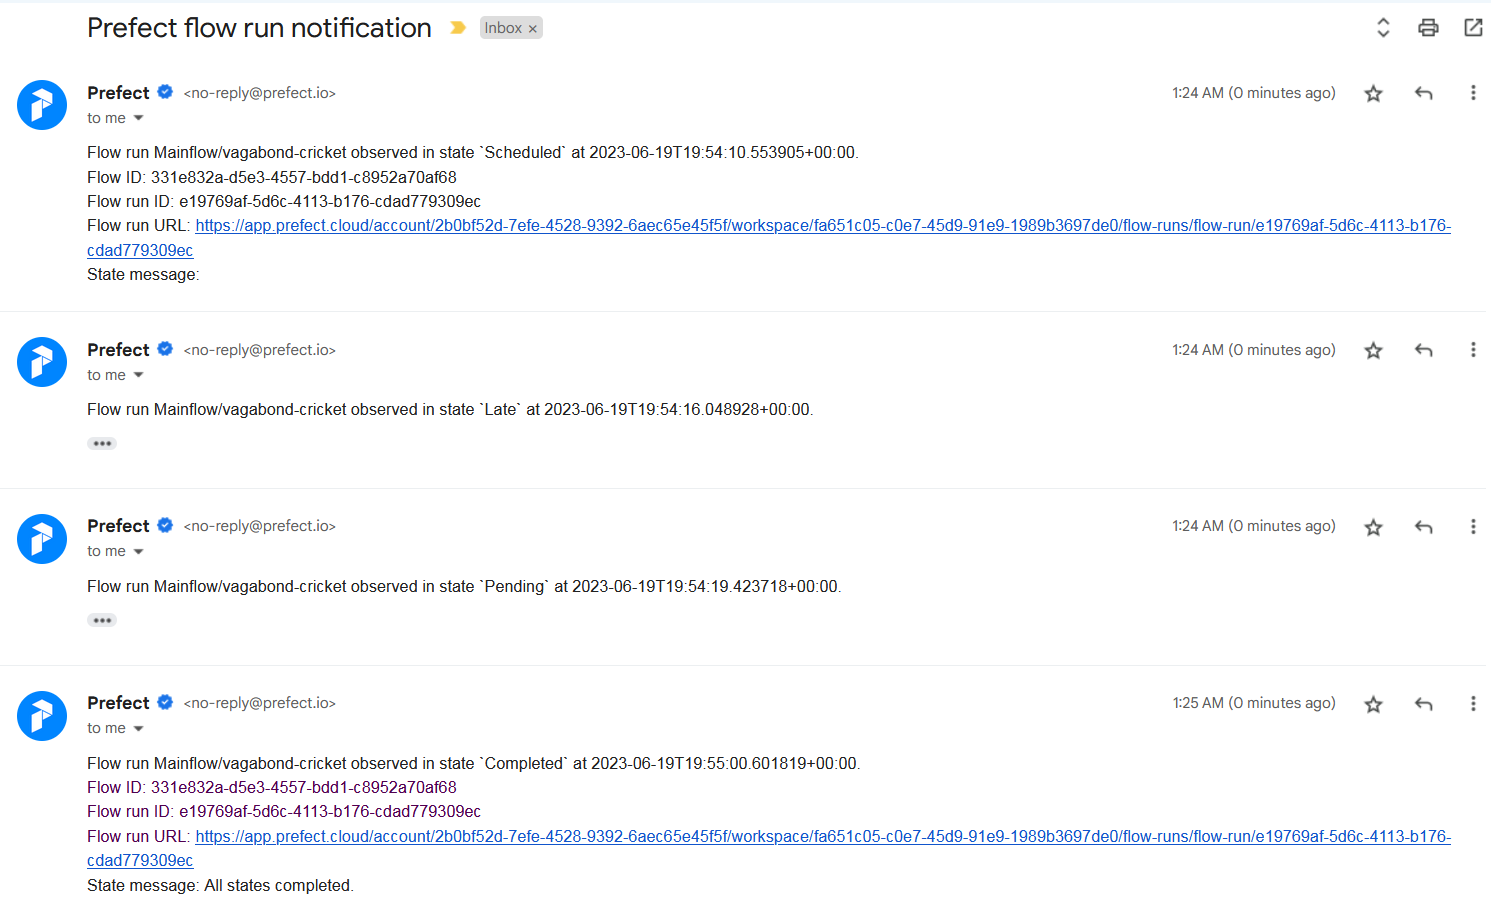

## Submit the results

* Submit your results here: https://forms.gle/nVSYH5fGGamdY1LaA
* You can submit your solution multiple times. In this case, only the last submission will be used
* If your answer doesn't match options exactly, select the closest one

## Deadline

The deadline for submitting is 12 June (Monday), 23:00 CEST (Berlin time). 

After that, the form will be closed.